# carregar base de dados

In [1]:
!curl -L -o ../datasets/mnist-dataset.zip https://www.kaggle.com/api/v1/datasets/download/hojjatk/mnist-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 22.0M  100 22.0M    0     0  8647k      0  0:00:02  0:00:02 --:--:-- 11.3M


In [1]:
import zipfile
zipper = zipfile.ZipFile("../datasets/mnist-dataset.zip")
zipper.extractall("../datasets/mnist")

In [2]:
import numpy as np

In [3]:
with open("../datasets/mnist/train-images.idx3-ubyte", "rb") as f:
    f.read(16)
    traindata = f.read()
    traindata = np.frombuffer(traindata, dtype = np.uint8)
    traindata = traindata.reshape(-1,28*28)
    traindata = traindata /255
    traindata = traindata.astype(np.float32)

In [4]:
traindata.shape

(60000, 784)

In [5]:
with open("../datasets/mnist/train-labels.idx1-ubyte", "rb") as f:
    f.read(8)
    trainlabel = f.read()
    trainlabel = np.frombuffer(trainlabel, dtype = np.uint8).copy()

In [6]:
trainlabel.shape

(60000,)

In [7]:
with open("../datasets/mnist/t10k-images.idx3-ubyte", "rb") as f:
    f.read(16)
    testdata = f.read()
    testdata = np.frombuffer(testdata, dtype = np.uint8)
    testdata = testdata.reshape(-1,28*28)
    testdata = testdata /255
    testdata = testdata.astype(np.float32)

In [8]:
testdata.shape

(10000, 784)

In [9]:
with open("../datasets/mnist/t10k-labels.idx1-ubyte", "rb") as f:
    f.read(8)
    testlabel = f.read()
    testlabel = np.frombuffer(testlabel, dtype = np.uint8).copy()

In [10]:
testlabel.shape

(10000,)

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = traindata[5]
some_digit_image = some_digit.reshape(28,28)

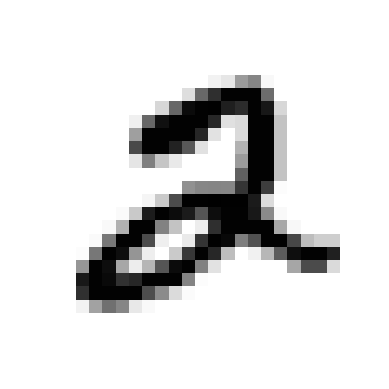

In [12]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
trainlabel[5]

np.uint8(2)

In [15]:
np.min(traindata)

np.float32(0.0)

In [16]:
np.max(traindata)

np.float32(1.0)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(traindata, trainlabel, test_size=0.2, random_state=42)

In [18]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=5)
clf.fit(X_train, y_train)

,C,5
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
y_pred = clf.predict(X_test)

In [21]:
clf.score(X_test, y_test)

0.9283333333333333

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1138    0    8    1    2   14    4    3    5    0]
 [   0 1295    6    5    1    2    1    1    9    2]
 [   6   15 1079   15   12    4    8   15   18    2]
 [   7   13   34 1102    3   31    1    5   15    8]
 [   4    2    7    0 1116    2    6    6    3   30]
 [  20    6   10   49    7  978   12    2   16    4]
 [   7    3   14    1    6   12 1129    1    4    0]
 [   2    7   23   13   20    1    0 1215    2   16]
 [   8   21   19   32    9   34   13    6 1010    8]
 [   6    5   10   12   34    5    0   32   12 1078]]


In [24]:
clf.predict([X_test[1]])

array([7], dtype=uint8)

In [25]:
y_test[0]

np.uint8(7)

In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, Input

In [43]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [45]:
model = Sequential()
model.add(Input(shape=(28,28,1)))
model.add(layers.Conv2D(32, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))
 

In [46]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
batch_size = 128
epochs = 5

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8726 - loss: 0.4162 - val_accuracy: 0.9663 - val_loss: 0.1084
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9597 - loss: 0.1296 - val_accuracy: 0.9762 - val_loss: 0.0686
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9709 - loss: 0.0948 - val_accuracy: 0.9810 - val_loss: 0.0565
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9749 - loss: 0.0803 - val_accuracy: 0.9821 - val_loss: 0.0563
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9784 - loss: 0.0673 - val_accuracy: 0.9869 - val_loss: 0.0452


In [50]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04827510938048363
Test accuracy: 0.9848333597183228


In [58]:
np.argmax(model.predict(X_test[5].reshape(1, 28, 28, 1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


np.int64(9)

In [59]:
y_test[5]

np.uint8(9)